Computing the symbolic regression might be slow - You can rescale for each Diffusion Maps coordinate and the run the plot cell to create the plots

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gplearn.genetic import SymbolicRegressor,SymbolicTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

plt.style.use('seaborn-white')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=25)
plt.rc('font', family='serif')
plt.rc('font', family='serif')
plt.rcParams['image.cmap'] = 'Spectral'

### Read the excel sheet. I changed the header of the sheets. It was difficult to read that format.

In [2]:
df_k = pd.read_excel('Parameters_new.xlsx', sheet_name='effective')
df_phi = pd.read_excel('Parameters_new.xlsx', sheet_name='dmap')
df_original = pd.read_excel('Parameters_new.xlsx',sheet_name = 'Original_Parameters')

In [3]:
df_original

k1         k2           k3           k4        k5           k6
0     0.771005  18.302227  6276.451208  8656.390913  0.983139  5299.366491
1     0.775961  19.582073  7033.534894  9482.568562  1.018057  5679.759006
2     0.640191  17.504489  6430.262976  9487.796577  1.030104  5587.062950
3     0.775980  19.850004  6890.916939  9600.114662  0.963714  5018.608065
4     0.701430  19.872819  7361.979545  9525.447630  1.026420  4857.750828
...        ...        ...          ...          ...       ...          ...
9995  0.696077  18.644513  7307.981965  9521.586552  0.978449  4961.027253
9996  0.683664  18.730690  6750.433080  8516.946854  0.994097  5601.914389
9997  0.697925  17.745888  7039.438803  8926.425045  0.912738  5463.628877
9998  0.652733  19.039338  6902.118130  9657.638325  0.951870  4875.716579
9999  0.740122  18.818729  7008.136359  8422.208232  0.991781  5546.315161

[10000 rows x 6 columns]

# Firstly I will try to learn $\kappa_1$ based on the original parameters

$\kappa_1 = E\frac{k_1k_3}{k_2 + k_3}$


In [4]:
X = df_original.values # original parameters
y1 = df_phi.values[:,0] # phi1
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
scaler = MinMaxScaler(feature_range=(-1, 1))
y1 = scaler.fit_transform(y1.reshape(-1,1))
y1 = y1.reshape(-1,)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=42)

In [6]:
# Create added value features
function_set = ['add', 'sub', 'mul', 'div']


# gp1 = SymbolicRegressor(generations=30, population_size=10000,
#                          function_set=function_set,
#                        stopping_criteria= 0.001,
#                          parsimony_coefficient=0.01,
#                          max_samples=0.9, verbose=1,
#                          random_state=0, n_jobs=3)

# gp1.fit(X_train1, y_train1)

In [21]:
y_new1 = gp1.predict(X_test1)

In [22]:
gp1.score(X_test1,y_test1)

0.9738005545899336

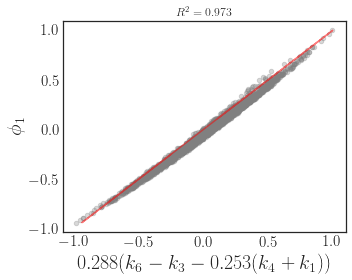

In [6]:
new = (X_test1[:,4] + X_test1[:,0] - X_test1[:,3] + X_test1[:,5])*(-0.288)

fig, ax = plt.subplots(1,1, figsize=(5,4))
ax.scatter(new, y_test1, s=20, alpha=0.3, rasterized=True, c='grey')
ax.plot(y_test1, y_test1, c='r',alpha = 0.5)

ax.set_xlabel(r'$0.288(k_6 -k_3 - 0.253(k_4 + k_1))$');
ax.set_title(r'$R^2 = 0.973$')

ax.set_ylabel(r'$\phi_1$');
plt.tight_layout();


# I will try to learn $\kappa_2$ based on the original parameters
$\kappa_2 = 0.66\frac{k_5k_6}{k_4 + k_6}$

In [7]:
X = df_original.values # original parameters
y2 = df_phi.values[:,1] # phi2
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
scaler = MinMaxScaler(feature_range=(-1, 1))
y2 = scaler.fit_transform(y2.reshape(-1,1))
y2 = y2.reshape(-1,)
X_train2, X_test2, y_train2, y_test2= train_test_split(X, y2, test_size=0.2, random_state=42)

In [90]:
# Create added value features
function_set = ['add', 'sub', 'mul', 'div']

gp1 = SymbolicRegressor(generations=30, population_size=10000,
                         function_set=function_set,
                       stopping_criteria= 0.001,
                         parsimony_coefficient=0.001,
                         max_samples=0.9, verbose=1,
                         random_state=0, n_jobs=3)

gp1.fit(X_train1, y_train1)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    29.19      2.68222e+06        3         0.233382         0.245662      2.84m
   1     8.37          1.59633        9         0.127043         0.126262      5.21m
   2     4.81         0.524187        7        0.0725151        0.0748071      5.25m
   3     4.40         0.354448        7        0.0528081        0.0534188      6.38m
   4     5.72         0.310447       11        0.0498898        0.0455629      6.37m
   5     7.17         0.293191       13        0.0478887        0.0483068      4.83m
   6     6.85         0.269151       13        0.0475941        0.0500225      5.37m
   7     5.47         0.287668        5        0.0477529        0.0501397      4.42m
   8     5.06          0.23202        5        0.0473043        0.0541772  

SymbolicRegressor(const_range=(-1.0, 1.0), feature_names=None,
                  function_set=['add', 'sub', 'mul', 'div'], generations=30,
                  init_depth=(2, 6), init_method='half and half',
                  low_memory=False, max_samples=0.9,
                  metric='mean absolute error', n_jobs=3, p_crossover=0.9,
                  p_hoist_mutation=0.01, p_point_mutation=0.01,
                  p_point_replace=0.05, p_subtree_mutation=0.01,
                  parsimony_coefficient=0.001, population_size=10000,
                  random_state=0, stopping_criteria=0.001, tournament_size=20,
                  verbose=1, warm_start=False)

# I will try to learn $\pi$ based on the original parameters

$\pi = \frac{k_6}{k_4 + k_6}$

In [9]:
X = df_original.values # original parameters
y3 = df_phi.values[:,2] # phi3

scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
scaler = MinMaxScaler(feature_range=(-1, 1))
y3 = scaler.fit_transform(y3.reshape(-1,1))
y3 = y3.reshape(-1,)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.2, random_state=42)

In [178]:
# Create added value features
function_set = ['add', 'sub', 'mul', 'div']


gp3 = SymbolicRegressor(generations=20, population_size=50000,
                         function_set=function_set,
                       stopping_criteria= 0.01,
                         parsimony_coefficient=0.001,
                         max_samples=0.9, verbose=1,
                         random_state=0, n_jobs=3)



gp3.fit(X_train3, y_train3)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    28.78      4.01778e+06        7         0.188953          0.18408     25.51m
   1     8.65          8.79782       17         0.175112         0.180065     46.14m
   2     4.55          2.94916        7         0.162877         0.167424     43.51m
   3     4.08          2.64987       15         0.154169         0.152029     41.68m
   4     5.46         0.322074       15         0.128884         0.132139     33.06m
   5     8.26         0.342392       23         0.112566         0.113389     36.17m
   6     9.47          1.18253       15         0.102192         0.107383     37.12m
   7    11.11         0.368266       13         0.101112         0.106041     32.48m
   8    12.83         0.586712       17        0.0943025        0.0942818  

SymbolicRegressor(const_range=(-1.0, 1.0), feature_names=None,
                  function_set=['add', 'sub', 'mul', 'div'], generations=20,
                  init_depth=(2, 6), init_method='half and half',
                  low_memory=False, max_samples=0.9,
                  metric='mean absolute error', n_jobs=3, p_crossover=0.9,
                  p_hoist_mutation=0.01, p_point_mutation=0.01,
                  p_point_replace=0.05, p_subtree_mutation=0.01,
                  parsimony_coefficient=0.001, population_size=50000,
                  random_state=0, stopping_criteria=0.01, tournament_size=20,
                  verbose=1, warm_start=False)

In [199]:
# The expression of the program 
print(gp3._program)

mul(sub(sub(sub(sub(sub(X5, mul(div(X4, 0.724), X0)), add(X4, add(X0, X3))), 0.218), 0.218), mul(mul(X0, -0.340), X0)), 0.218)


### Plots

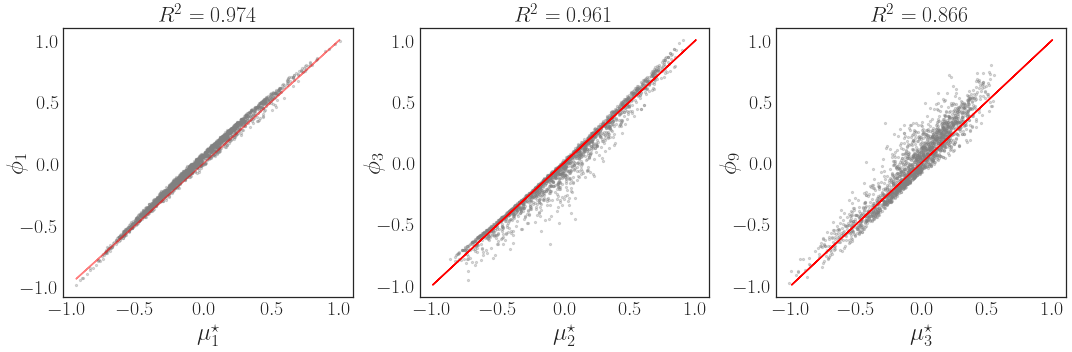

In [10]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
new =(X_test1[:,4] + X_test1[:,0]+ X_test1[:,5] - X_test1[:,3] )*(-0.288)
plt.scatter(y_test1, new, s=5, alpha=0.3, rasterized=True, c='grey')
plt.plot(y_test1, y_test1, c='r',alpha = 0.5)
plt.xlabel(r'$\mu_1^\star$',fontsize =24);
plt.title(r'$R^2 = 0.974$',fontsize =22)
plt.ylabel(r'$\phi_1$',fontsize =24, labelpad=-8);
plt.locator_params(axis="x", nbins=5)
plt.locator_params(axis="y", nbins=5)

plt.tight_layout();

plt.subplot(1,3,2)
new_parameter2  = 0.455*(X_test2[:,0] - X_test2[:,4])
plt.scatter(new_parameter2, y_test2, s=5, alpha=0.3, rasterized=True, c='grey')
plt.plot(y2, y2, c='r')
plt.xlabel(r'$\mu_2^\star$' ,fontsize =24);
plt.ylabel(r'$\phi_3$',fontsize =24, labelpad=-8);
plt.title(r'$R^2 = 0.961$',fontsize =22)
plt.locator_params(axis="x", nbins=5)
plt.locator_params(axis="y", nbins=5)
plt.tight_layout();

plt.subplot(1,3,3)
new_3 = 0.218*(0.340*X_test3[:,0]**2 -X_test3[:,0]*X_test3[:,4]/0.724 -X_test3[:,4] + X_test3[:,5] - X_test3[:,0]- X_test3[:,3] -0.218*2)
#plt.scatter(y_new3, y_test3, s=1, alpha=0.3, rasterized=True, c='grey')
plt.scatter(new_3, y_test3, s=5, alpha=0.3, rasterized=True, c='grey')

plt.plot(y3, y3, c='r')
plt.xlabel(r'$\mu_3^\star$',fontsize =24)
plt.ylabel(r'$\phi_9$',fontsize =24, labelpad=-8);
plt.title(r'$R^2 = 0.866$',fontsize =22)
plt.locator_params(axis="x", nbins=5)
plt.locator_params(axis="y", nbins=5)
plt.tight_layout();

